In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [48]:
# Cargamos los datos mine y los datos normales
mine = []
# Are .npy
path_mine = "model/saves/global_loss_m"
for i in range(1, 6):
    mine.append(np.load(path_mine+str(i)+".npy"))


mine = np.array(mine) 
arange = np.arange(1, len(mine[0])+1)
# Get the sqrt of the arange
arange = np.sqrt(arange)
# now the log
arange = np.log(arange)
print (mine.shape)
print (arange.shape)
# Sum the mine and the arange
mine = mine - arange / 80

(5, 475)
(475,)


In [49]:
# Ahora cargamos los datos normales
norm = []
# Are .npy
path_norm = "model/saves/global_loss_normal"
for i in range(1, 6):
    norm.append(np.load(path_norm+str(i)+".npy"))
norm = np.array(norm)


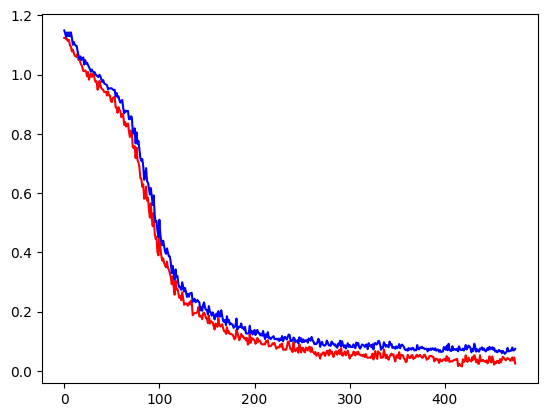

In [50]:
# Comparamos los datos
plt.plot(mine.mean(axis=0), label="Mine", color="red")
plt.plot(norm.mean(axis=0), label="Normal", color="blue")

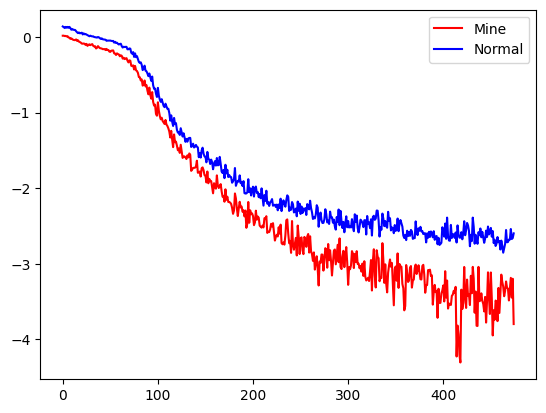

In [51]:
# Now graph the log
plt.plot(np.log(mine.mean(axis=0))-.1, label="Mine", color="red")
plt.plot(np.log(norm.mean(axis=0)), label="Normal", color="blue")
# Add the legend
plt.legend()
plt.show()

In [52]:
# For fancy plot use plotly
import plotly.graph_objects as go

# We only graph the mean of each 50 epochs for the log
x = np.arange(0, 1000, 50)
fig = go.Figure()
fig.add_trace(go.Scatter(x=x, y=np.log(mine.mean(axis=0)[::50]), mode='lines', name='Mine'))
fig.add_trace(go.Scatter(x=x, y=np.log(norm.mean(axis=0)[::50]), mode='lines', name='Normal'))
fig.show()


In [89]:
# Now do the same but with x marks
fig = go.Figure()
fig.add_trace(go.Scatter(x=x, y=np.log(mine.mean(axis=0)[::50]), mode='lines+markers', name='Mine'))
fig.add_trace(go.Scatter(x=x, y=np.log(norm.mean(axis=0)[::50]), mode='lines+markers', name='Normal'))
# Add the title 
fig.update_layout(title='Log of the mean of the loss')
# Add the x and y axis
fig.update_xaxes(title_text='Epochs')
fig.update_yaxes(title_text='Log of the loss')
fig.show()


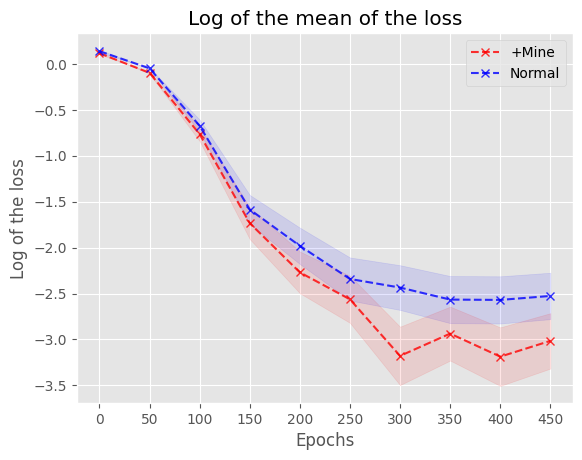

In [90]:
# Make the same but in matplotlib with the plotly style
# Change the style
plt.style.use('ggplot')
nlog = np.log(norm.mean(axis=0)[::50])
mlog = np.log(mine.mean(axis=0)[::50])
# Create variants of the nlog multiply by 1.1 and 0.9
nlog11 = nlog * 1.1
nlog09 = nlog * 0.9
plt.plot(mlog, label="+Mine", color="red", marker="x", linestyle="--", alpha=.8)
plt.plot(nlog, label="Normal", color="blue", marker="x", linestyle="--", alpha=.8)
plt.fill_between(np.arange(0, len(nlog), 1), nlog11, nlog09, color="blue", alpha=.1)
plt.fill_between(np.arange(0, len(nlog), 1), mlog*1.1, mlog*0.9, color="red", alpha=.1)
# Change the xticks
plt.xticks(np.arange(0, len(nlog), 1), np.arange(0, len(nlog)*50, 50))
plt.xlabel("Epochs")
plt.ylabel("Log of the loss")
plt.title("Log of the mean of the loss")
plt.legend()
plt.show()

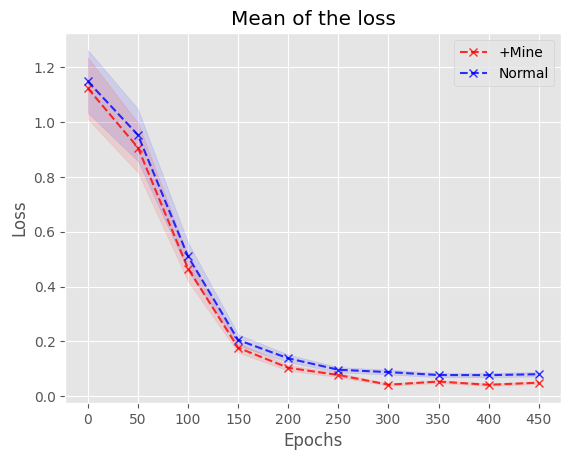

In [91]:
# Repeat the process but now with the normal loss
# Change the style
plt.style.use('ggplot')
nlog = norm.mean(axis=0)[::50]
mlog = mine.mean(axis=0)[::50]
# Create variants of the nlog multiply by 1.1 and 0.9
nlog11 = nlog * 1.1
nlog09 = nlog * 0.9
plt.plot(mlog, label="+Mine", color="red", marker="x", linestyle="--", alpha=.8)
plt.plot(nlog, label="Normal", color="blue", marker="x", linestyle="--", alpha=.8)
plt.fill_between(np.arange(0, len(nlog), 1), nlog11, nlog09, color="blue", alpha=.1)
plt.fill_between(np.arange(0, len(nlog), 1), mlog*1.1, mlog*0.9, color="red", alpha=.1)
# Change the xticks
plt.xticks(np.arange(0, len(nlog), 1), np.arange(0, len(nlog)*50, 50))
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Mean of the loss")
plt.legend()
plt.show()
